In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
X.shape

(150, 4)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the input features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

In [7]:
y_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [8]:
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomActivation, self).__init__()
        self.k0 = self.add_weight(shape=(1,), initializer='he_normal', trainable=True)
        self.k1 = self.add_weight(shape=(1,), initializer='he_normal', trainable=True)
    
    def call(self, inputs):
        return self.k0 + self.k1 * inputs

In [9]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=CustomActivation(), input_shape=(4,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        k0 = self.model.layers[0].get_weights()[1][-1]
        k1 = self.model.layers[0].get_weights()[0][:, -1]
        print(f"Epoch {epoch + 1} - k0: {k0}, k1: {k1}")

In [12]:
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, validation_data=(X_test, y_test_encoded), callbacks=[CustomCallback()])

Epoch 1/100
12/12 [==============================] - 2s 28ms/step - loss: 2.4548 - accuracy: 0.4167 - val_loss: 1.2131 - val_accuracy: 0.3667
Epoch 2/100
12/12 [==============================] - 0s 6ms/step - loss: 1.7196 - accuracy: 0.3750 - val_loss: 0.9095 - val_accuracy: 0.7000
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 1.4781 - accuracy: 0.3833 - val_loss: 0.7434 - val_accuracy: 0.7000
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0492 - accuracy: 0.5417 - val_loss: 0.6442 - val_accuracy: 0.8667
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.9222 - accuracy: 0.5833 - val_loss: 0.5362 - val_accuracy: 0.7333
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.7080 - accuracy: 0.6667 - val_loss: 0.4730 - val_accuracy: 0.9000
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6744 - accuracy: 0.6083 - val_loss: 0.4426 - val_accuracy: 0.9333
Epoch 8/100


12/12 [==============================] - 0s 5ms/step - loss: 0.2174 - accuracy: 0.9167 - val_loss: 0.1578 - val_accuracy: 0.9333
Epoch 28/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2198 - accuracy: 0.9250 - val_loss: 0.1347 - val_accuracy: 0.9667
Epoch 29/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2443 - accuracy: 0.8917 - val_loss: 0.1267 - val_accuracy: 1.0000
Epoch 30/100
12/12 [==============================] - 0s 5ms/step - loss: 0.2494 - accuracy: 0.9000 - val_loss: 0.1199 - val_accuracy: 1.0000
Epoch 31/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1942 - accuracy: 0.9417 - val_loss: 0.1222 - val_accuracy: 0.9667
Epoch 32/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1693 - accuracy: 0.9500 - val_loss: 0.1086 - val_accuracy: 0.9667
Epoch 33/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1726 - accuracy: 0.9167 - val_loss: 0.1028 - val_accuracy: 1.0000
Epoch 34/100
12/12 

12/12 [==============================] - 0s 5ms/step - loss: 0.1462 - accuracy: 0.9250 - val_loss: 0.0994 - val_accuracy: 0.9667
Epoch 54/100
12/12 [==============================] - 0s 8ms/step - loss: 0.1212 - accuracy: 0.9583 - val_loss: 0.0683 - val_accuracy: 0.9667
Epoch 55/100
12/12 [==============================] - 0s 6ms/step - loss: 0.1180 - accuracy: 0.9583 - val_loss: 0.0682 - val_accuracy: 0.9667
Epoch 56/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1306 - accuracy: 0.9417 - val_loss: 0.0656 - val_accuracy: 0.9667
Epoch 57/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1454 - accuracy: 0.9333 - val_loss: 0.0687 - val_accuracy: 0.9667
Epoch 58/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1531 - accuracy: 0.9333 - val_loss: 0.0642 - val_accuracy: 0.9667
Epoch 59/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1823 - accuracy: 0.9333 - val_loss: 0.0642 - val_accuracy: 0.9667
Epoch 60/100
12/12 

12/12 [==============================] - 0s 5ms/step - loss: 0.1282 - accuracy: 0.9667 - val_loss: 0.0567 - val_accuracy: 0.9667
Epoch 80/100
12/12 [==============================] - 0s 5ms/step - loss: 0.0967 - accuracy: 0.9583 - val_loss: 0.0764 - val_accuracy: 0.9667
Epoch 81/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1001 - accuracy: 0.9583 - val_loss: 0.0529 - val_accuracy: 0.9667
Epoch 82/100
12/12 [==============================] - 0s 4ms/step - loss: 0.0995 - accuracy: 0.9583 - val_loss: 0.0568 - val_accuracy: 1.0000
Epoch 83/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1147 - accuracy: 0.9500 - val_loss: 0.0847 - val_accuracy: 0.9667
Epoch 84/100
12/12 [==============================] - 0s 5ms/step - loss: 0.1381 - accuracy: 0.9417 - val_loss: 0.0539 - val_accuracy: 1.0000
Epoch 85/100
12/12 [==============================] - 0s 4ms/step - loss: 0.1087 - accuracy: 0.9667 - val_loss: 0.0684 - val_accuracy: 0.9667
Epoch 86/100
12/12 

In [13]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1/1 [==============================] - 0s 211ms/step - loss: 0.0734 - accuracy: 0.9667
Test Loss: 0.07342558354139328
Test Accuracy: 0.9666666388511658


In [14]:
# Retrieve the learned values of k0 and k1
k0 = model.layers[0].get_weights()[1][-1]
k1 = model.layers[0].get_weights()[0][:, -1]
print("k0:", k0)
print("k1:", k1)

k0: 0.52130234
k1: [ 0.15964708  0.66050684 -1.2817582  -1.0792134 ]


In [15]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 103ms/step


In [16]:
# Convert one-hot encoded labels back to original labels
y_test_labels = np.argmax(y_test_encoded, axis=1)

In [17]:
from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



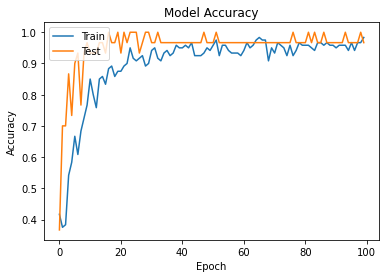

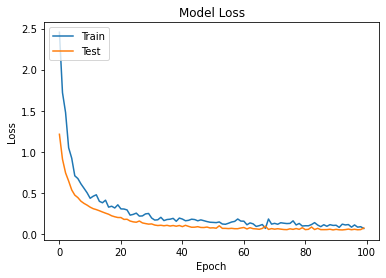

In [18]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
breast_cancer = load_breast_cancer()
X, y = breast_cancer.data, breast_cancer.target

In [21]:
X.shape

(569, 30)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the input features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

In [25]:
y_train_encoded

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [26]:
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomActivation, self).__init__()
        self.k0 = self.add_weight(shape=(1,), initializer='he_normal', trainable=True)
        self.k1 = self.add_weight(shape=(1,), initializer='he_normal', trainable=True)
    
    def call(self, inputs):
        return self.k0 + self.k1 * inputs

In [27]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=CustomActivation(), input_shape=(30,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [28]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        k0 = self.model.layers[0].get_weights()[1][-1]
        k1 = self.model.layers[0].get_weights()[0][:, -1]
        print(f"Epoch {epoch + 1} - k0: {k0}, k1: {k1}")

In [30]:
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, validation_data=(X_test, y_test_encoded), callbacks=[CustomCallback()])

Epoch 1/100
28/46 [=================>............] - ETA: 0s - loss: 0.6241 - accuracy: 0.6393 Epoch 1 - k0: 0.1603521853685379, k1: [ 0.17009072 -0.00800728 -0.33347192 -0.16355158 -0.12472506  0.15808947
 -0.23550925 -0.48305163 -0.18797599  0.03488703 -0.33991703  0.4272055
 -0.07204182  0.14915459  0.14231941 -0.01663283  0.403408    0.23658068
 -0.18151493 -0.0061425   0.2750089  -0.15398802 -0.33223566  0.07760146
 -0.02358413 -0.17766683 -0.11700155  0.19666566  0.15470226  0.32634673]
46/46 [==============================] - 1s 8ms/step - loss: 0.5307 - accuracy: 0.7319 - val_loss: 0.2619 - val_accuracy: 0.9561
Epoch 2/100
29/46 [=================>............] - ETA: 0s - loss: 0.2792 - accuracy: 0.9103Epoch 2 - k0: 0.1625252068042755, k1: [ 0.19931787  0.02614366 -0.30370614 -0.1296265  -0.11003939  0.17840558
 -0.20342337 -0.438866   -0.16904087  0.03247726 -0.30412266  0.4317259
 -0.03846414  0.1914484   0.15239686 -0.02228348  0.3760754   0.24198866
 -0.18130432 -0.0339569

26/46 [===============>..............] - ETA: 0s - loss: 0.0938 - accuracy: 0.9692Epoch 14 - k0: -0.05142766237258911, k1: [ 3.4108558e-01  3.7543270e-01 -1.6504286e-01  1.4556196e-01
  2.5042113e-02  7.6714277e-02  2.1295813e-01  2.1285072e-01
 -9.6599355e-02 -1.4956872e-01  4.1700745e-01  4.2411163e-01
  3.9405608e-01  1.0918814e+00  4.1623247e-01 -5.3892064e-01
  1.3978116e-01  3.4881142e-01 -2.6537570e-01 -4.8403421e-01
  6.9454372e-01  3.8019648e-01 -2.5162683e-04  6.7541808e-01
  3.6951011e-01 -1.7056911e-01  1.4425769e-01  6.3201928e-01
  6.6174430e-01  3.6355293e-01]
46/46 [==============================] - 0s 3ms/step - loss: 0.0991 - accuracy: 0.9604 - val_loss: 0.0614 - val_accuracy: 0.9737
Epoch 15/100
27/46 [================>.............] - ETA: 0s - loss: 0.0617 - accuracy: 0.9815Epoch 15 - k0: -0.10773349553346634, k1: [ 0.29658443  0.34339106 -0.20793793  0.10781902 -0.016327    0.04050214
  0.23699462  0.20174357 -0.1542646  -0.18874548  0.38883585  0.36111504
  0.348

Epoch 27/100
31/46 [===================>..........] - ETA: 0s - loss: 0.0763 - accuracy: 0.9710Epoch 27 - k0: -0.3727438449859619, k1: [ 0.15694548  0.20425822 -0.34290615  0.02409951 -0.19618793 -0.14650144
  0.43060276  0.3704223  -0.21778783 -0.33085638  0.46612185  0.00661523
  0.24733756  1.2991763   0.24270137 -0.8547853  -0.06908874  0.13722001
 -0.2392359  -0.8458918   0.6916995   0.42657766 -0.05244484  0.79352564
  0.30381694 -0.2023517   0.32286236  0.66726106  1.0420238   0.3597145 ]
46/46 [==============================] - 0s 3ms/step - loss: 0.0669 - accuracy: 0.9736 - val_loss: 0.0806 - val_accuracy: 0.9737
Epoch 28/100
33/46 [====================>.........] - ETA: 0s - loss: 0.1536 - accuracy: 0.9485Epoch 28 - k0: -0.4553540349006653, k1: [ 0.0919122   0.15472032 -0.40817034 -0.03198843 -0.25602913 -0.19432904
  0.409233    0.33984244 -0.24556452 -0.37340602  0.45424396 -0.09860159
  0.18856035  1.2729001   0.19476819 -0.9290289  -0.14111227  0.07224398
 -0.20153826 -0.

Epoch 40/100
33/46 [====================>.........] - ETA: 0s - loss: 0.0778 - accuracy: 0.9788Epoch 40 - k0: -0.5136533379554749, k1: [ 0.2277289   0.22657926 -0.2796296   0.16323365 -0.2825837  -0.1876477
  0.54132026  0.50314647 -0.29310077 -0.39664835  0.54804385 -0.15830594
  0.15055847  1.5731367   0.37505296 -0.79677564 -0.16028664  0.02990559
 -0.19205756 -0.8420541   0.8813704   0.5905776   0.07594018  1.0855553
  0.34807104 -0.05700317  0.47237244  0.71279734  1.3451004   0.48031312]
46/46 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9846 - val_loss: 0.0527 - val_accuracy: 0.9825
Epoch 41/100
34/46 [=====================>........] - ETA: 0s - loss: 0.0794 - accuracy: 0.9794Epoch 41 - k0: -0.5010916590690613, k1: [ 0.24021117  0.26358682 -0.26830548  0.17743824 -0.2832826  -0.20772101
  0.5465471   0.50961477 -0.29692635 -0.40045193  0.58029187 -0.10249688
  0.17504205  1.6117597   0.34668547 -0.8159247  -0.17956595  0.01894551
 -0.22551103 -0.86

26/46 [===============>..............] - ETA: 0s - loss: 0.0930 - accuracy: 0.9692Epoch 53 - k0: -0.5959635376930237, k1: [ 1.4768365e-01  2.6931289e-01 -3.5847878e-01  9.9867992e-02
 -2.4552812e-01 -2.2006010e-01  6.4988315e-01  7.3820597e-01
 -3.6117488e-01 -2.4473117e-01  9.0283275e-01 -1.3485723e-03
  3.0382329e-01  1.9985870e+00  5.7259232e-01 -8.1428200e-01
 -2.6367825e-01  1.1098552e-01 -1.9077259e-01 -7.6883560e-01
  8.9184868e-01  7.7410841e-01  2.7371697e-02  1.1455011e+00
  3.6392605e-01 -1.0567016e-01  4.6948171e-01  7.4334598e-01
  1.4331717e+00  5.1620573e-01]
46/46 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.9758 - val_loss: 0.0553 - val_accuracy: 0.9825
Epoch 54/100
34/46 [=====================>........] - ETA: 0s - loss: 0.0729 - accuracy: 0.9765Epoch 54 - k0: -0.59287428855896, k1: [ 0.15847068  0.2766516  -0.34847242  0.11287879 -0.24284393 -0.22947602
  0.6655096   0.77007127 -0.3616894  -0.25287053  0.93367016  0.00798247
  0.3228439

Epoch 66/100
34/46 [=====================>........] - ETA: 0s - loss: 0.0557 - accuracy: 0.9824Epoch 66 - k0: -0.6705102920532227, k1: [ 0.13218385  0.3374501  -0.37901574  0.10486361 -0.33538425 -0.34587547
  0.67525005  0.83348477 -0.4233031  -0.33477607  0.97554594  0.05817085
  0.24200329  2.1682234   0.6644961  -0.79097474 -0.30741513  0.14203641
 -0.27125666 -0.7500494   0.928686    0.9641561   0.0220216   1.2264515
  0.27185035 -0.13194278  0.47634     0.763699    1.4932317   0.48556656]
46/46 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9824 - val_loss: 0.0583 - val_accuracy: 0.9737
Epoch 67/100
33/46 [====================>.........] - ETA: 0s - loss: 0.0727 - accuracy: 0.9788Epoch 67 - k0: -0.6545694470405579, k1: [ 0.1529712   0.33048153 -0.36016092  0.12738504 -0.32692477 -0.35791093
  0.6893855   0.8434722  -0.39453435 -0.3371192   0.97034764  0.06024882
  0.22580285  2.1690068   0.6513269  -0.81115067 -0.30239525  0.13939159
 -0.28501728 -0.7

32/46 [===================>..........] - ETA: 0s - loss: 0.0762 - accuracy: 0.9719Epoch 79 - k0: -0.734894871711731, k1: [ 0.04197739  0.23864041 -0.4766041   0.02233932 -0.35022727 -0.5086934
  0.67069954  0.8617057  -0.48670012 -0.2960508   1.2010987   0.05701702
  0.30128983  2.3997414   0.73021585 -0.85521436 -0.28825992  0.1789504
 -0.39497676 -0.8388595   0.8964231   0.95378375 -0.05666034  1.2238321
  0.24308223 -0.2361307   0.49569038  0.7217933   1.4718587   0.41130418]
46/46 [==============================] - 0s 3ms/step - loss: 0.0603 - accuracy: 0.9802 - val_loss: 0.0699 - val_accuracy: 0.9825
Epoch 80/100
34/46 [=====================>........] - ETA: 0s - loss: 0.0604 - accuracy: 0.9794Epoch 80 - k0: -0.7010819315910339, k1: [ 0.08455433  0.24929763 -0.4358103   0.06832415 -0.31206647 -0.4988231
  0.69119775  0.90041214 -0.4664626  -0.26878077  1.2472012   0.07585312
  0.33660358  2.4546263   0.7786401  -0.85192215 -0.28095242  0.20771979
 -0.40834352 -0.81929284  0.943768

Epoch 92/100
32/46 [===================>..........] - ETA: 0s - loss: 0.0634 - accuracy: 0.9812Epoch 92 - k0: -0.6930223703384399, k1: [ 0.080644    0.2177687  -0.43986148  0.06740406 -0.23273952 -0.5464454
  0.73648643  1.0615478  -0.42361158 -0.15378933  1.4439223   0.03865469
  0.43421894  2.693954    0.796762   -0.966637   -0.39536428  0.25279212
 -0.5386327  -0.85579044  1.0174716   1.0193139   0.02765294  1.3841977
  0.34328458 -0.26702124  0.5468343   0.81782275  1.5666164   0.45422128]
46/46 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9824 - val_loss: 0.0671 - val_accuracy: 0.9737
Epoch 93/100
33/46 [====================>.........] - ETA: 0s - loss: 0.0839 - accuracy: 0.9697Epoch 93 - k0: -0.7725238800048828, k1: [ 0.02461344  0.14806667 -0.49848258  0.01731924 -0.31626058 -0.6538835
  0.6012002   0.98002124 -0.4994554  -0.27088308  1.3968107  -0.04378752
  0.38041523  2.657201    0.73595494 -1.067077   -0.5448675   0.16121967
 -0.624816   -0.961

In [31]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 [==============================] - 0s 6ms/step - loss: 0.0605 - accuracy: 0.9737
Test Loss: 0.060534846037626266
Test Accuracy: 0.9736841917037964


In [32]:
# Retrieve the learned values of k0 and k1
k0 = model.layers[0].get_weights()[1][-1]
k1 = model.layers[0].get_weights()[0][:, -1]
print("k0:", k0)
print("k1:", k1)

k0: -0.81332475
k1: [ 5.8690317e-02  1.0933575e-01 -4.6074557e-01  6.6521376e-02
 -3.0466944e-01 -5.7311404e-01  7.4560368e-01  1.1529673e+00
 -4.9758229e-01 -2.5202888e-01  1.4834962e+00  1.6692678e-03
  4.3936384e-01  2.7919140e+00  8.6811596e-01 -9.3486702e-01
 -4.6637061e-01  2.9184699e-01 -6.2470794e-01 -8.4764260e-01
  1.0084317e+00  9.6528703e-01  1.0745192e-02  1.4099429e+00
  2.2689699e-01 -2.7603537e-01  4.9694550e-01  8.0251330e-01
  1.5162344e+00  3.9229494e-01]


In [33]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

4/4 [==============================] - 0s 3ms/step


In [34]:
# Convert one-hot encoded labels back to original labels
y_test_labels = np.argmax(y_test_encoded, axis=1)

In [35]:
from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



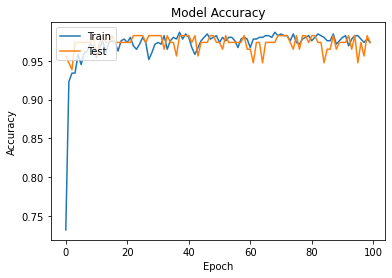

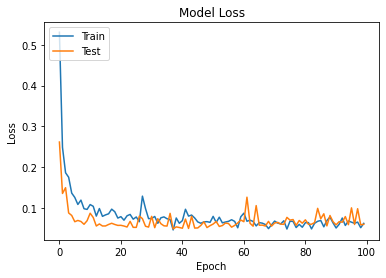

In [36]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [37]:
import pandas as pd

In [38]:
df = pd.read_csv('C:\\Users\\Sambhu\\Downloads\\BankNote.csv')

In [39]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [40]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [41]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the input features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

In [45]:
y_train_encoded

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [46]:
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomActivation, self).__init__()
        self.k0 = self.add_weight(shape=(1,), initializer='he_normal', trainable=True)
        self.k1 = self.add_weight(shape=(1,), initializer='he_normal', trainable=True)
    
    def call(self, inputs):
        return self.k0 + self.k1 * inputs

In [47]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=CustomActivation(), input_shape=(4,)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        k0 = self.model.layers[0].get_weights()[1][-1]
        k1 = self.model.layers[0].get_weights()[0][:, -1]
        print(f"Epoch {epoch + 1} - k0: {k0}, k1: {k1}")

In [50]:
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10, validation_data=(X_test, y_test_encoded), callbacks=[CustomCallback()])

Epoch 1/100
110/110 [==============================] - 1s 4ms/step - loss: 1.0811 - accuracy: 0.6326 - val_loss: 0.4207 - val_accuracy: 0.8109
Epoch 2/100
110/110 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8286 - val_loss: 0.2781 - val_accuracy: 0.9018
Epoch 3/100
110/110 [==============================] - 0s 2ms/step - loss: 0.2527 - accuracy: 0.9025 - val_loss: 0.1847 - val_accuracy: 0.9309
Epoch 4/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9398 - val_loss: 0.1391 - val_accuracy: 0.9527
Epoch 5/100
110/110 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9581 - val_loss: 0.1069 - val_accuracy: 0.9709
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1174 - accuracy: 0.9681 - val_loss: 0.0928 - val_accuracy: 0.9636
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.0988 - accuracy: 0.9681 - val_loss: 0.0668 - val_accuracy: 0.9782

Epoch 27/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9863 - val_loss: 0.0597 - val_accuracy: 0.9855
Epoch 28/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0743 - accuracy: 0.9717 - val_loss: 0.0428 - val_accuracy: 0.9855
Epoch 29/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9790 - val_loss: 0.0473 - val_accuracy: 0.9855
Epoch 30/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9754 - val_loss: 0.0483 - val_accuracy: 0.9855
Epoch 31/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9799 - val_loss: 0.0331 - val_accuracy: 0.9855
Epoch 32/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0394 - accuracy: 0.9845 - val_loss: 0.0318 - val_accuracy: 0.9818
Epoch 33/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9799 - val_loss: 0.0439 - val_accuracy:

Epoch 53/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9891 - val_loss: 0.0470 - val_accuracy: 0.9818
Epoch 54/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9891 - val_loss: 0.0355 - val_accuracy: 0.9855
Epoch 55/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9790 - val_loss: 0.2315 - val_accuracy: 0.9164
Epoch 56/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9727 - val_loss: 0.0597 - val_accuracy: 0.9855
Epoch 57/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9827 - val_loss: 0.0368 - val_accuracy: 0.9855
Epoch 58/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0418 - accuracy: 0.9881 - val_loss: 0.0400 - val_accuracy: 0.9818
Epoch 59/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9818 - val_loss: 0.0348 - val_accuracy:

Epoch 79/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9872 - val_loss: 0.0627 - val_accuracy: 0.9855
Epoch 80/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0402 - accuracy: 0.9836 - val_loss: 0.0293 - val_accuracy: 0.9855
Epoch 81/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0513 - accuracy: 0.9836 - val_loss: 0.0316 - val_accuracy: 0.9855
Epoch 82/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9854 - val_loss: 0.0355 - val_accuracy: 0.9818
Epoch 83/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9836 - val_loss: 0.0342 - val_accuracy: 0.9855
Epoch 84/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9809 - val_loss: 0.0507 - val_accuracy: 0.9891
Epoch 85/100
110/110 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9754 - val_loss: 0.0325 - val_accuracy:

In [51]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

9/9 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9927
Test Loss: 0.04034900292754173
Test Accuracy: 0.9927272796630859


In [52]:
# Retrieve the learned values of k0 and k1
k0 = model.layers[0].get_weights()[1][-1]
k1 = model.layers[0].get_weights()[0][:, -1]
print("k0:", k0)
print("k1:", k1)

k0: 0.86696523
k1: [-1.3196614  -1.3718448  -1.519376    0.01151995]


In [53]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

9/9 [==============================] - 0s 3ms/step


In [54]:
# Convert one-hot encoded labels back to original labels
y_test_labels = np.argmax(y_test_encoded, axis=1)

In [55]:
from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



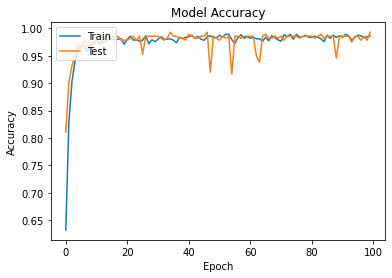

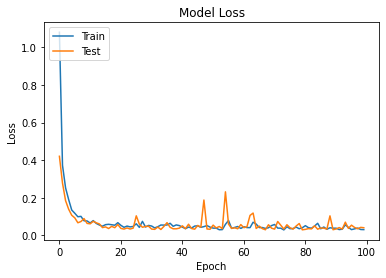

In [56]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [57]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [58]:
# Reshape the input features
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [59]:
X_train.shape

(60000, 784)

In [60]:
# Normalize the input features
X_train = X_train / 255.0
X_test = X_test / 255.0

In [61]:
encoder = OneHotEncoder(sparse=False)
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

In [62]:
y_train_encoded.shape

(60000, 10)

In [63]:
class CustomActivation(tf.keras.layers.Layer):
    def __init__(self):
        super(CustomActivation, self).__init__()
        self.k0 = self.add_weight(shape=(1,), initializer='he_normal', trainable=True)
        self.k1 = self.add_weight(shape=(1,), initializer='he_normal', trainable=True)
    
    def call(self, inputs):
        return self.k0 + self.k1 * inputs

In [64]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=CustomActivation(), input_shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [65]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        k0 = self.model.layers[0].get_weights()[1][-1]
        k1 = self.model.layers[0].get_weights()[0][:, -1]
        print(f"Epoch {epoch + 1} - k0: {k0}, k1: {k1}")

In [67]:
## Importing the EarlyStopping call back function
from keras.callbacks import EarlyStopping

earlystopping = EarlyStopping(monitor='val_loss', patience=5)

In [68]:
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_test, y_test_encoded), callbacks=[CustomCallback(), earlystopping])

Epoch 1/100
1861/1875 [============================>.] - ETA: 0s - loss: 0.3658 - accuracy: 0.8962Epoch 1 - k0: 0.2902977168560028, k1: [ 4.86123338e-02  3.27054709e-02 -4.43153903e-02 -2.39061043e-02
  2.91667879e-04 -4.23346311e-02 -5.95086515e-02  6.22616038e-02
  2.41124853e-02 -8.40808675e-02 -5.59917539e-02  3.66149098e-02
 -3.02089095e-01 -1.89935789e-01  2.40340024e-01 -9.14184097e-03
 -4.79135066e-02 -3.78798470e-02 -2.99212672e-02  7.86003545e-02
 -1.91397965e-04 -8.52269083e-02  6.43054917e-02 -2.96648517e-02
  6.50051981e-03 -4.93294001e-03  6.83627501e-02 -7.73867518e-02
 -1.98782012e-02  1.07286051e-02  7.08477721e-02 -4.35964018e-02
 -1.90128654e-01 -3.07687879e-01 -4.13682014e-01 -5.86466372e-01
 -2.84823358e-01 -3.97093087e-01 -4.09477890e-01 -4.86847967e-01
 -1.11608112e+00 -4.93441492e-01  2.99047261e-01  5.42484894e-02
 -1.65490642e-01 -4.07681882e-01 -9.97439146e-01 -9.10861194e-01
 -8.05351257e-01 -4.85838473e-01 -3.56327087e-01 -4.30142015e-01
 -4.45582122e-02  6

Epoch 2/100
1873/1875 [============================>.] - ETA: 0s - loss: 0.3047 - accuracy: 0.9144Epoch 2 - k0: 0.5332164764404297, k1: [ 4.86123338e-02  3.27054709e-02 -4.43153903e-02 -2.39061043e-02
  2.91667879e-04 -4.23346311e-02 -5.95086515e-02  6.22616038e-02
  2.41124853e-02 -8.40808675e-02 -5.59917539e-02  3.66149098e-02
 -4.23131794e-01 -3.11633408e-01  2.94237882e-01 -4.92252642e-03
 -4.79135066e-02 -3.78798470e-02 -2.99212672e-02  7.86003545e-02
 -1.91397965e-04 -8.52269083e-02  6.43054917e-02 -2.96648517e-02
  6.50051981e-03 -4.93294001e-03  6.83627501e-02 -7.73867518e-02
 -1.98782012e-02  1.07286051e-02  7.08477721e-02 -4.35964018e-02
 -3.25133592e-01 -3.96083593e-01 -6.75001442e-01 -8.66585374e-01
 -3.86943310e-01 -4.75471497e-01 -5.36398470e-01 -6.72760069e-01
 -1.69518411e+00 -1.09554422e+00  1.86856925e-01 -5.73295593e-01
 -6.90520942e-01 -9.89770412e-01 -1.71218050e+00 -1.28508103e+00
 -1.14610994e+00 -7.81770229e-01 -7.64847457e-01 -7.86077678e-01
 -4.45582122e-02  6

Epoch 3/100
1863/1875 [============================>.] - ETA: 0s - loss: 0.2934 - accuracy: 0.9165Epoch 3 - k0: 0.6523654460906982, k1: [ 4.86123338e-02  3.27054709e-02 -4.43153903e-02 -2.39061043e-02
  2.91667879e-04 -4.23346311e-02 -5.95086515e-02  6.22616038e-02
  2.41124853e-02 -8.40808675e-02 -5.59917539e-02  3.66149098e-02
 -5.55882931e-01 -4.43668902e-01  3.80782396e-01  4.36180824e-04
 -4.79135066e-02 -3.78798470e-02 -2.99212672e-02  7.86003545e-02
 -1.91397965e-04 -8.52269083e-02  6.43054917e-02 -2.96648517e-02
  6.50051981e-03 -4.93294001e-03  6.83627501e-02 -7.73867518e-02
 -1.98782012e-02  1.07286051e-02  7.08477721e-02 -4.35964018e-02
 -3.44667733e-01 -4.23214197e-01 -9.80962634e-01 -1.20071161e+00
 -8.21830690e-01 -8.54863703e-01 -9.78784800e-01 -9.96807158e-01
 -2.52555084e+00 -1.65538442e+00  4.03511733e-01 -7.13244021e-01
 -7.68166244e-01 -1.22188592e+00 -1.92855382e+00 -1.50311387e+00
 -1.42332506e+00 -8.67125809e-01 -8.34713757e-01 -8.64159465e-01
 -4.45582122e-02  6

Epoch 4/100
1863/1875 [============================>.] - ETA: 0s - loss: 0.2866 - accuracy: 0.9198Epoch 4 - k0: 0.715743362903595, k1: [ 4.86123338e-02  3.27054709e-02 -4.43153903e-02 -2.39061043e-02
  2.91667879e-04 -4.23346311e-02 -5.95086515e-02  6.22616038e-02
  2.41124853e-02 -8.40808675e-02 -5.59917539e-02  3.66149098e-02
 -7.73193777e-01 -6.63063943e-01  5.29953122e-01  1.23329777e-02
 -4.79135066e-02 -3.78798470e-02 -2.99212672e-02  7.86003545e-02
 -1.91397965e-04 -8.52269083e-02  6.43054917e-02 -2.96648517e-02
  6.50051981e-03 -4.93294001e-03  6.83627501e-02 -7.73867518e-02
 -1.98782012e-02  1.07286051e-02  7.08477721e-02 -4.35964018e-02
 -4.64536071e-01 -5.82180142e-01 -1.25635278e+00 -1.62874436e+00
 -1.11103380e+00 -1.00969338e+00 -1.09885764e+00 -1.80518651e+00
 -3.28531361e+00 -2.00855231e+00  7.31398940e-01 -8.52476537e-01
 -9.64182496e-01 -1.65188909e+00 -2.54009867e+00 -1.78193772e+00
 -1.81723118e+00 -1.18681502e+00 -1.23257923e+00 -1.27267241e+00
 -4.45582122e-02  6.

Epoch 5/100
1868/1875 [============================>.] - ETA: 0s - loss: 0.2810 - accuracy: 0.9221Epoch 5 - k0: 0.845913827419281, k1: [ 4.86123338e-02  3.27054709e-02 -4.43153903e-02 -2.39061043e-02
  2.91667879e-04 -4.23346311e-02 -5.95086515e-02  6.22616038e-02
  2.41124853e-02 -8.40808675e-02 -5.59917539e-02  3.66149098e-02
 -9.34737504e-01 -8.16605628e-01  6.68911934e-01  2.25986820e-02
 -4.79135066e-02 -3.78798470e-02 -2.99212672e-02  7.86003545e-02
 -1.91397965e-04 -8.52269083e-02  6.43054917e-02 -2.96648517e-02
  6.50051981e-03 -4.93294001e-03  6.83627501e-02 -7.73867518e-02
 -1.98782012e-02  1.07286051e-02  7.08477721e-02 -4.35964018e-02
 -5.88676214e-01 -7.91543365e-01 -1.32562721e+00 -1.75621641e+00
 -1.45753062e+00 -1.11303914e+00 -1.02997863e+00 -1.91098785e+00
 -3.58596849e+00 -2.28528118e+00  8.45102787e-01 -1.12696624e+00
 -1.29173601e+00 -2.06051755e+00 -2.85667133e+00 -2.15187407e+00
 -2.38058257e+00 -1.27673471e+00 -1.37439370e+00 -1.57856619e+00
 -4.45582122e-02  6.

Epoch 6/100
1855/1875 [============================>.] - ETA: 0s - loss: 0.2783 - accuracy: 0.9222Epoch 6 - k0: 0.8104185461997986, k1: [ 4.86123338e-02  3.27054709e-02 -4.43153903e-02 -2.39061043e-02
  2.91667879e-04 -4.23346311e-02 -5.95086515e-02  6.22616038e-02
  2.41124853e-02 -8.40808675e-02 -5.59917539e-02  3.66149098e-02
 -1.09153330e+00 -9.16464567e-01  8.55511367e-01  4.07284945e-02
 -4.79135066e-02 -3.78798470e-02 -2.99212672e-02  7.86003545e-02
 -1.91397965e-04 -8.52269083e-02  6.43054917e-02 -2.96648517e-02
  6.50051981e-03 -4.93294001e-03  6.83627501e-02 -7.73867518e-02
 -1.98782012e-02  1.07286051e-02  7.08477721e-02 -4.35964018e-02
 -6.11593187e-01 -8.44801962e-01 -1.61547267e+00 -2.07637858e+00
 -1.69709289e+00 -1.29772472e+00 -1.29826617e+00 -2.57342744e+00
 -4.25433159e+00 -2.90149426e+00  9.35501516e-01 -1.58121645e+00
 -1.80745888e+00 -2.34610367e+00 -3.08519697e+00 -2.44589877e+00
 -2.74136710e+00 -1.48903692e+00 -1.64215136e+00 -1.85322714e+00
 -4.45582122e-02  6

Epoch 7/100
1846/1875 [============================>.] - ETA: 0s - loss: 0.2745 - accuracy: 0.9230Epoch 7 - k0: 0.8603475689888, k1: [ 4.86123338e-02  3.27054709e-02 -4.43153903e-02 -2.39061043e-02
  2.91667879e-04 -4.23346311e-02 -5.95086515e-02  6.22616038e-02
  2.41124853e-02 -8.40808675e-02 -5.59917539e-02  3.66149098e-02
 -1.20240533e+00 -1.05286133e+00  8.76186371e-01  4.24283668e-02
 -4.79135066e-02 -3.78798470e-02 -2.99212672e-02  7.86003545e-02
 -1.91397965e-04 -8.52269083e-02  6.43054917e-02 -2.96648517e-02
  6.50051981e-03 -4.93294001e-03  6.83627501e-02 -7.73867518e-02
 -1.98782012e-02  1.07286051e-02  7.08477721e-02 -4.35964018e-02
 -6.41776025e-01 -9.44108725e-01 -1.94452786e+00 -2.43119550e+00
 -1.71845388e+00 -1.43441224e+00 -1.44927788e+00 -3.03048968e+00
 -4.88248062e+00 -3.47203803e+00  1.16944957e+00 -1.88209522e+00
 -2.05194187e+00 -2.61995840e+00 -3.34371972e+00 -2.91098619e+00
 -3.08846998e+00 -1.91189468e+00 -1.84382701e+00 -1.92999947e+00
 -4.45582122e-02  6.18

In [69]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.2941 - accuracy: 0.9197
Test Loss: 0.2941182851791382
Test Accuracy: 0.919700026512146


In [70]:
# Retrieve the learned values of k0 and k1
k0 = model.layers[0].get_weights()[1][-1]
k1 = model.layers[0].get_weights()[0][:, -1]
print("k0:", k0)
print("k1:", k1)

k0: 0.86034757
k1: [ 4.86123338e-02  3.27054709e-02 -4.43153903e-02 -2.39061043e-02
  2.91667879e-04 -4.23346311e-02 -5.95086515e-02  6.22616038e-02
  2.41124853e-02 -8.40808675e-02 -5.59917539e-02  3.66149098e-02
 -1.20240533e+00 -1.05286133e+00  8.76186371e-01  4.24283668e-02
 -4.79135066e-02 -3.78798470e-02 -2.99212672e-02  7.86003545e-02
 -1.91397965e-04 -8.52269083e-02  6.43054917e-02 -2.96648517e-02
  6.50051981e-03 -4.93294001e-03  6.83627501e-02 -7.73867518e-02
 -1.98782012e-02  1.07286051e-02  7.08477721e-02 -4.35964018e-02
 -6.41776025e-01 -9.44108725e-01 -1.94452786e+00 -2.43119550e+00
 -1.71845388e+00 -1.43441224e+00 -1.44927788e+00 -3.03048968e+00
 -4.88248062e+00 -3.47203803e+00  1.16944957e+00 -1.88209522e+00
 -2.05194187e+00 -2.61995840e+00 -3.34371972e+00 -2.91098619e+00
 -3.08846998e+00 -1.91189468e+00 -1.84382701e+00 -1.92999947e+00
 -4.45582122e-02  6.18368462e-02 -6.74750432e-02 -6.92642927e-02
  3.07120308e-02  6.15009591e-02 -4.87996101e-01 -1.58256626e+00
 -2.59

In [71]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 1ms/step


In [72]:
# Convert one-hot encoded labels back to original labels
y_test_labels = np.argmax(y_test_encoded, axis=1)

In [73]:
from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       980
           1       0.95      0.98      0.97      1135
           2       0.90      0.91      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.87      0.87      0.87       892
           6       0.97      0.90      0.93       958
           7       0.95      0.92      0.93      1028
           8       0.90      0.86      0.88       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



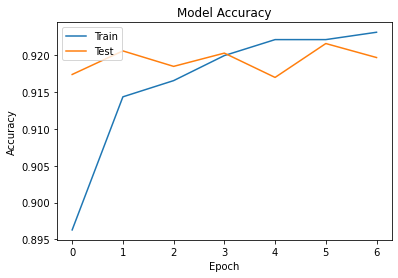

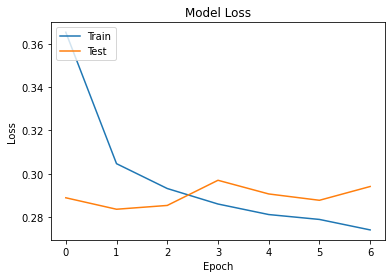

In [74]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()